In [32]:
from pandas_datareader import data
import pandas as pd

from datetime import datetime
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [33]:
# 종목 코드
tickers=["AAPL"]

In [34]:
data_source="yahoo"

start_date=datetime(2016,1,1)
end_date=datetime(2020,1,20)

In [35]:
AAPL=data.DataReader(tickers[0], data_source, start_date, end_date)

In [36]:
AAPL.head() # volume : 거래 양 / Adj Close : 수정 종가

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,107.029999,104.820000,107.010002,105.260002,40912300.0,98.362572
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868


In [37]:
AAPL.index # 날짜가 인덱스 / 여기서 데이터타입은 문자열이 아닌 datetime

DatetimeIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17'],
              dtype='datetime64[ns]', name='Date', length=1019, freq=None)

In [38]:
# 여러 종목 받을 경우 -> 앞에서 사용한 vars()를 이용하여 각기 ticker 문자열을 변수로 변경
# 참고) 보통의 경우에는 panel 데이터로 받기도 함
tickerList=["AAPL","MS"]
for i in range(0, len(tickerList)):
    vars() [tickerList[i]]=data.DataReader(tickerList[i], data_source, start_date, end_date)

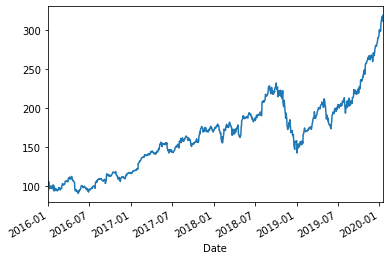

In [39]:
# 위에서 matplotlib를 inline을 해야 아래에 나타남
AAPL["Close"].plot()

##### 2016년 02월 1달에 대한 종가 그래프 보기

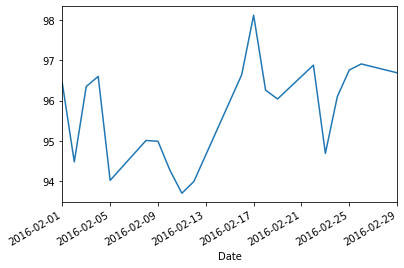

In [40]:
# 1달 정보
AAPL["2016-02"]["Close"].plot()

##### 1분기에 대해서 하려면?

In [41]:
# 분기(1분기) -> 리스트의 슬라이싱 이용(numpy,pandas에서 사용한 것들)
AAPL["2016-01-01":"2016-06-30"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438
...,...,...,...,...,...,...
2016-06-24,94.660004,92.650002,92.910004,93.400002,75311400.0,88.287621
2016-06-27,93.050003,91.500000,93.000000,92.040001,45489600.0,87.002052
2016-06-28,93.660004,92.139999,92.900002,93.589996,40444900.0,88.467209


##### 다음은 에러가 발생하는데 그 이유는?

In [42]:
# 날짜 마지막 등 확인 필요
#AAPL["2016-01-01":"2016-06-31"] # DateParseError: day is out of range for month

##### 상반기에 대해서 보려면?

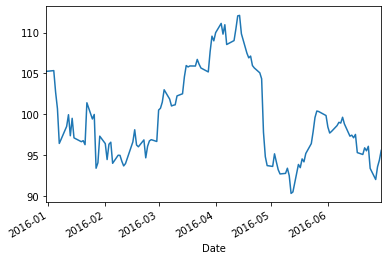

In [43]:
# 상반기
AAPL[:"2016-06-30"]["Close"].plot()

In [44]:
# 이동평균이 내부 정의되어 있음
AAPL["MA_5"]=AAPL["Close"].rolling(window=5).mean()
AAPL["MA_20"]=AAPL["Close"].rolling(window=20).mean()
AAPL["MA_60"]=AAPL["Close"].rolling(window=60).mean()
AAPL["MA_120"]=AAPL["Close"].rolling(window=120).mean()

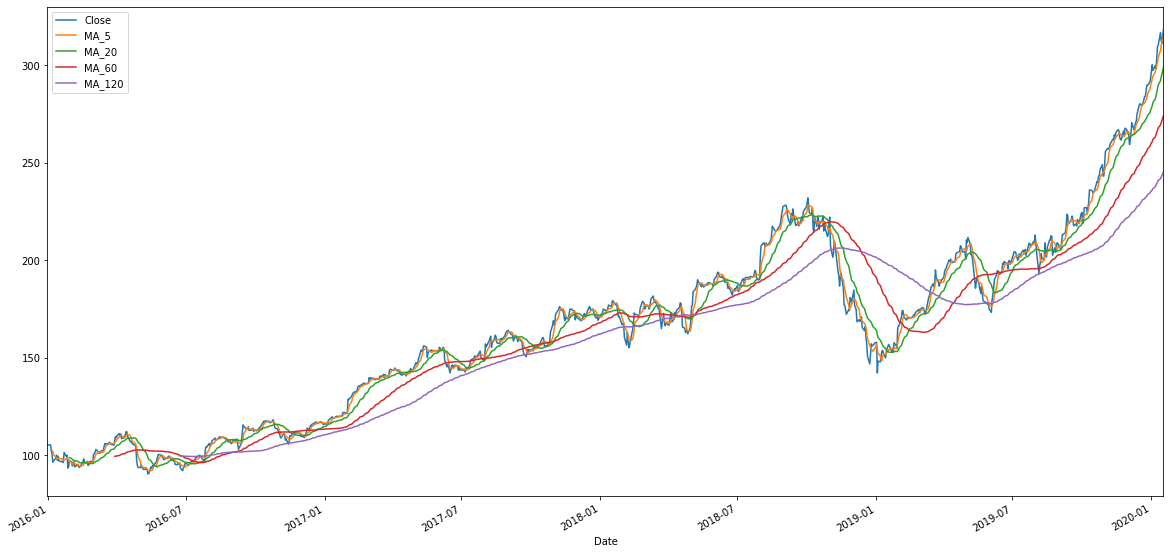

In [45]:
AAPL[["Close", "MA_5","MA_20","MA_60","MA_120"]].plot(figsize=(20,10))

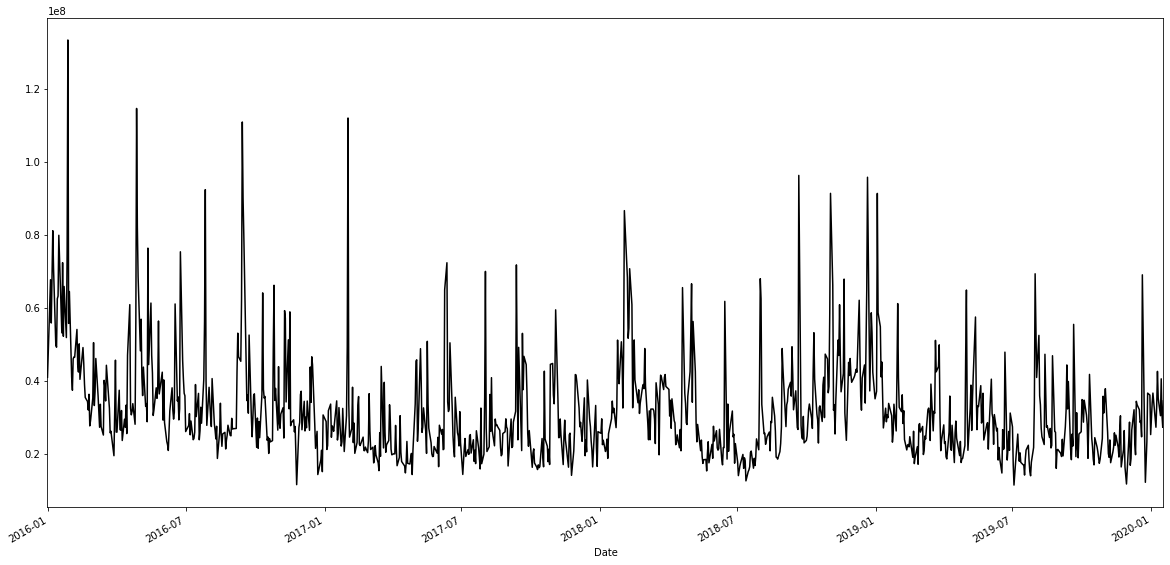

In [46]:
# 거래량 그래프 : 가격과 다른 그래프 색 사용
AAPL["Volume"].plot(figsize=(20,10), style="black")

#### 주요 지표를 만들어서 이에 대한 표시
장기 이평선과 단기 이평선이 교차하는 곳

In [47]:
# APPL["dif"] > 0 (5이평이 60이평 위에)
AAPL["dif"]=AAPL["MA_5"]-AAPL["MA_60"]
AAPL["dif_1day_before"]=AAPL["dif"].shift(1) 
# 하루 전날 5이평이 위에 있는지 밑에 있는지 확인하기 위해 dif 셀을 하나씩 밀어준다

In [48]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA_5,MA_20,MA_60,MA_120,dif,dif_1day_before
Date,,,,,,,,,,,,
2015-12-31,107.029999,104.820000,107.010002,105.260002,40912300.0,98.362572,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868,102.093999,NaN,NaN,NaN,NaN,NaN


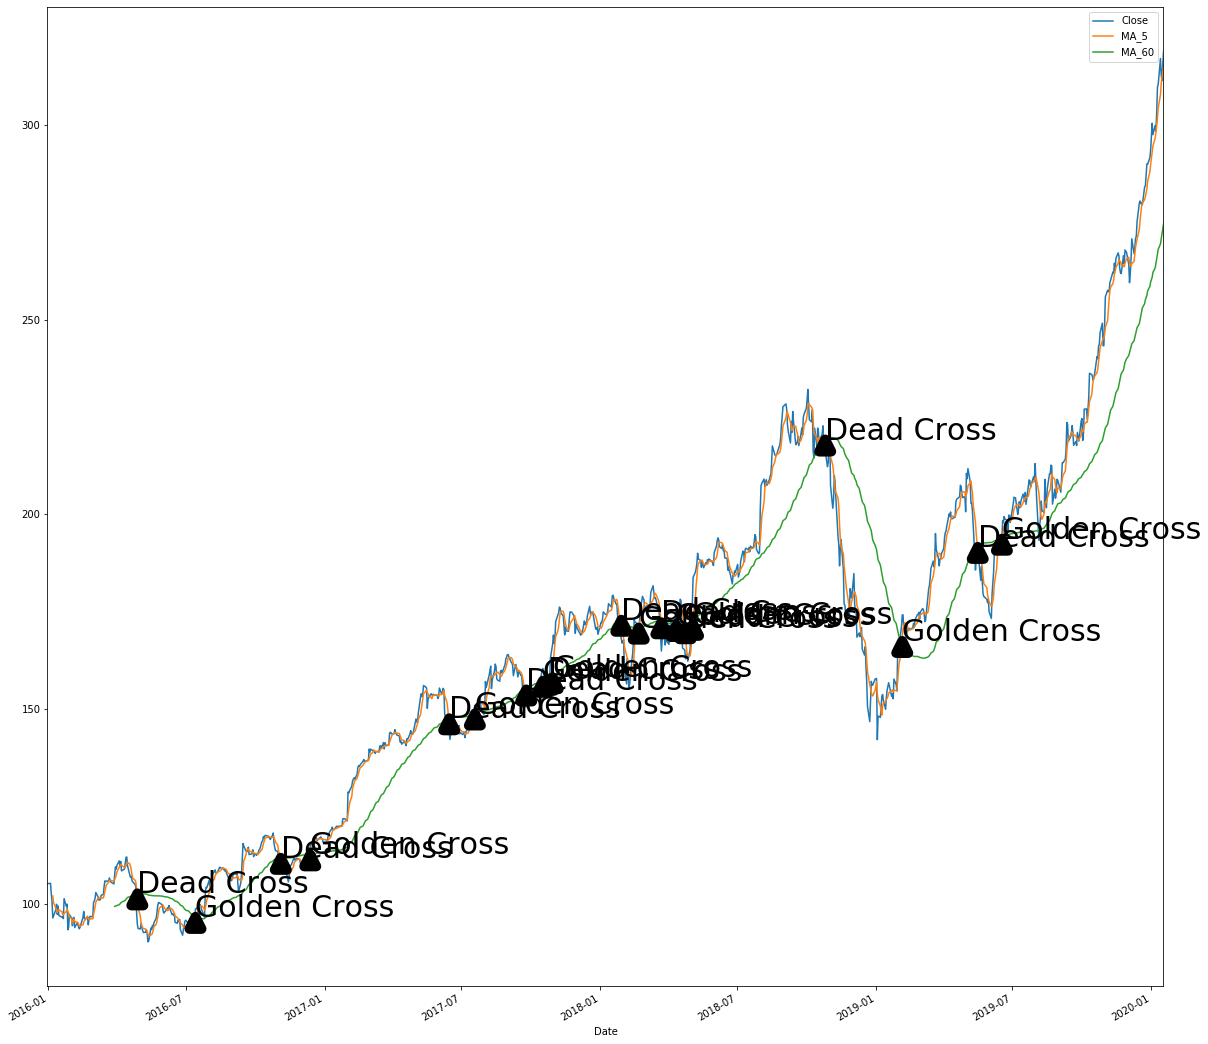

In [49]:
plt1=AAPL[["Close","MA_5","MA_60"]].plot(figsize=(20,20))

# index를 이용하기 위해 iteritems()
for index, vals in AAPL["dif"].iteritems():
    now_val=AAPL.at[index,"dif"]
    pre_val=AAPL.at[index,"dif_1day_before"]
    if (now_val * pre_val<0) & (now_val>0): # 단기가 장기를 뚫고 올라가는 경우
        plt1.annotate("Golden Cross", fontsize=30, xy=(index, AAPL["MA_60"][index]), arrowprops=dict(facecolor="black", linewidth=10))
    elif (now_val * pre_val<0) & (now_val<0): # 어제는 양수인 경우, 즉 단기가 내려가는 경우
        plt.annotate("Dead Cross", fontsize=30, xy=(index, AAPL["MA_60"][index]), arrowprops=dict(facecolor="black", linewidth=10))
# annotate : 그래프에 화살표를 그린 후 그 화살표에 문자열을 출력하는 기능
# plt.annotate('문자열',xy,xytext,arrowprops)
# 문자열 - 어노테이션에서 나타낼 문자열 / xy는 화살표가 가르키는 점의 위치 / xytext는 문자열이 출력될 위치 / arrowprops는 화살표의 속성

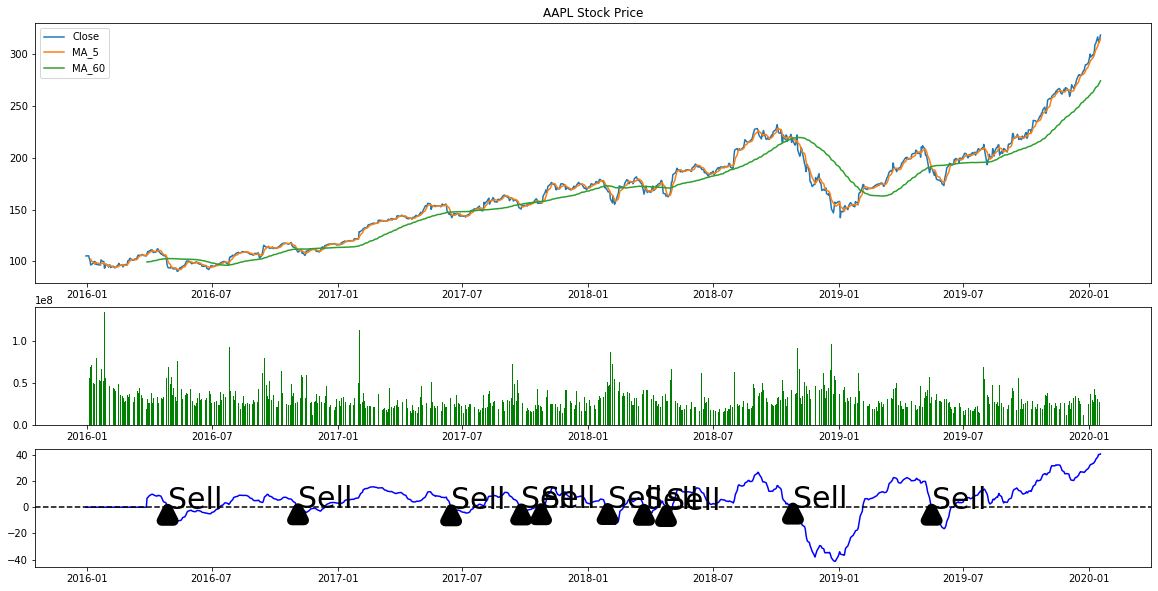

In [52]:
fig=plt.figure(figsize=(20,10))
pricechartplt=plt.subplot2grid((4,1),(0,0),rowspan=2)
pricechartplt.plot(AAPL.index, AAPL["Close"],label="Close")
pricechartplt.plot(AAPL.index, AAPL["MA_5"],label="MA_5")
pricechartplt.plot(AAPL.index, AAPL["MA_60"],label="MA_60")
plt.title("AAPL Stock Price")
plt.legend(loc="best")

volchart=plt.subplot2grid((4,1),(2,0),rowspan=1)
volchart.bar(AAPL.index, AAPL["Volume"], color="green")

sigchart=plt.subplot2grid((4,1),(3,0),rowspan=1)
sigchart.plot(AAPL.index, AAPL["dif"].fillna(0),color="blue")
plt.axhline(y=0,linestyle="--",color="black")

for index, vals in AAPL["dif"].iteritems():
    now_val=AAPL.at[index,"dif"]
    pre_val=AAPL.at[index,"dif_1day_before"]
    if (now_val * pre_val<0) & (now_val>0): # 단기가 장기를 뚫고 올라가는 경우
        plt1.annotate("Buy", fontsize=30, xy=(index, AAPL["dif"][index]), arrowprops=dict(facecolor="black", linewidth=10))
    elif (now_val * pre_val<0) & (now_val<0): # 어제는 양수인 경우, 즉 단기가 내려가는 경우
        plt.annotate("Sell", fontsize=30, xy=(index, AAPL["dif"][index]), arrowprops=dict(facecolor="black", linewidth=10))